# Flight Price Prediction

#### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

#### Import necessary Librarires

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#### Uploading Training Dataset

In [80]:
df = pd.read_excel('D:\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

In [81]:
df.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270


In [82]:
df.tail(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [83]:
df.shape

(10683, 11)

In the above Dataset there is total 10683 rows and 11 columns.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In the above Dataset there is total 11 columns in which one columns is int64 data type and 10 columns is object datatype.

In [85]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

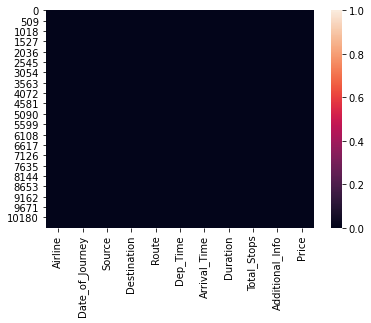

In [86]:
sns.heatmap(df.isnull())

In the avove observation we can see there is two null values present one is Route columns and one is Total_Stops we will handdle it later

#### Uploading Test Dataset

In [87]:
df_test = pd.read_excel('D:\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [88]:
df_test.head(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info


In [89]:
df_test.shape

(2671, 10)

In the above dataset there is total 2671 rows and 10 columns.

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 104.4+ KB


in the above observation we can see all columns is object datatype.

In [91]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there is no null values found in test datset which is good. 

In [92]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### FEATURES:
- Airline: The name of the airline.
- Date_of_Journey: The date of the journey
- Source: The source from which the service begins.
- Destination: The destination where the service ends.
- Route: The route taken by the flight to reach the destination.
- Dep_Time: The time when the journey starts from the source.
- Arrival_Time: Time of arrival at the destination.
- Duration: Total duration of the flight.
- Total_Stops: Total stops between the source and destination.
- Additional_Info: Additional information about the flight
- Price: The price of the ticket

In [93]:
# Treating null values
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [94]:
df[df['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [95]:
# Droping null values
df.dropna(axis=0,inplace=True)

In [96]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [97]:
df.shape

(10682, 11)

Now there is no null value in Trainnig Dataset

#### High Stats of Data


In [98]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- There is total no of count is 10682
- Minimum Price is 1759, Avegare price is 9087 and highest price is 79512.

In [99]:
#Checking for unique values present in each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [100]:
#checking Duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10682, dtype: bool

In [101]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Earlier the shape of data det is 10682 rows x 11 columns now the shape is 10462 rows × 11 columns there are 220 duplicates values found in dataset.

### Feature Engineering


In [102]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [103]:
df['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [104]:
# Extracintg Year, Month and Day from Date of Journey column:
df['Day_of_Journey'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['Month_of_Journey']=pd.DatetimeIndex(df['Date_of_Journey']).month
df['Year_of_Journey']=pd.DatetimeIndex(df['Date_of_Journey']).year

In [105]:
# Extracting hour and minutes from Dep_Time

df['Dep_Hour'] = pd.DatetimeIndex(df['Dep_Time']).hour
df['Dep_Minute'] = pd.DatetimeIndex(df['Dep_Time']).minute

In [106]:
#Extracting hour and minutes from Arrival_Time
df['Arrival_Hour'] = pd.DatetimeIndex(df['Arrival_Time']).hour
df['Arrival_Minute'] = pd.DatetimeIndex(df['Arrival_Time']).minute

In [107]:
#Extracting total duration in seconds
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

In [108]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,10200
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,26700
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,68400
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,19500
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,17100


In [109]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [110]:
#No info and No Info interprets the same meaning so replacing it with single name.
df.replace('No info','No Info',inplace = True)

#### Exploratoy Data Analysis(EDA)

In [33]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [34]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

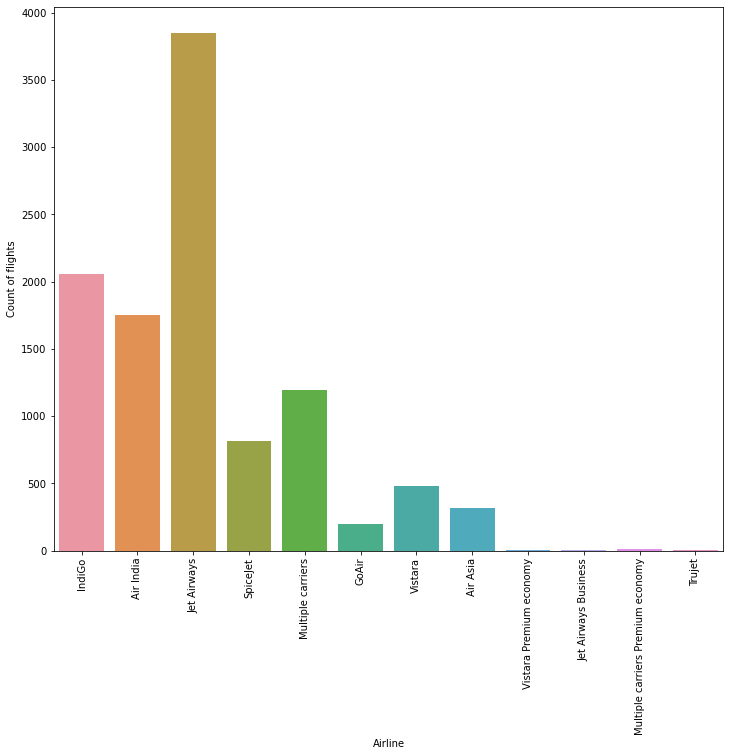

In [35]:
plt.figure(figsize = (12, 10))
sns.countplot(df['Airline'])
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation =90)

It is oserved that the Jet Airways has highest number of flights followed by Indigo and least count of flight airlines are Truejet and Vistara Premium economy.

In [36]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [37]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(0, 0.5, 'Count of flights')

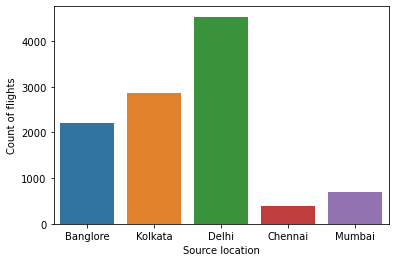

In [39]:
sns.countplot(df['Source'])
plt.xlabel('Source location')
plt.ylabel('Count of flights')

Delhi as source location have highest number of flight and lease number of flights are from Chennai

In [40]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [41]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Text(0, 0.5, 'Count of flights')

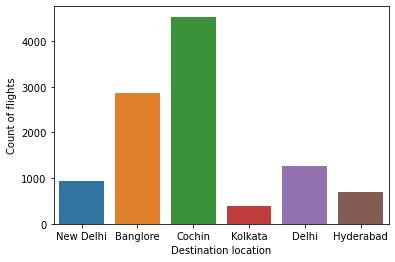

In [42]:
sns.countplot(df['Destination'])
plt.xlabel('Destination location')
plt.ylabel('Count of flights')

Cochin and Banglore city are among the top city for highest number of flight as destination location.

In [44]:
pd.crosstab(df['Source'],df['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4536,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


Highest number of flights(4346) are from Delhi to Cochin

In [45]:
df['Month_of_Journey'].value_counts()

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64

Text(0, 0.5, 'Count of flights')

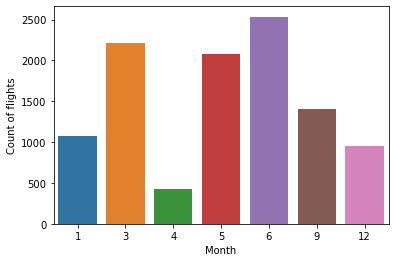

In [46]:
# Month wise flight distribution
sns.countplot(df['Month_of_Journey'])
plt.xlabel('Month')
plt.ylabel('Count of flights')

In the month of June there are most number of the flights followed by march and may but in the month of April we see that minimum amount of flights are running that may be because of the not much passenger travel in the month of the April and this is the time we could find more discounts on the flights.

In [47]:
df['Day_of_Journey'].value_counts()

6     2166
5     1391
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: Day_of_Journey, dtype: int64

Text(0, 0.5, 'Count of flights')

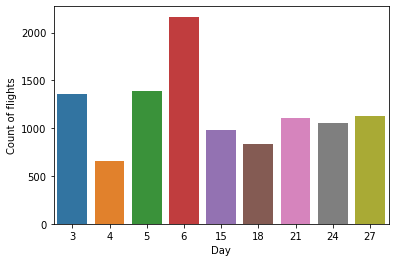

In [48]:
sns.countplot(df['Day_of_Journey'])
plt.xlabel('Day')
plt.ylabel('Count of flights')

On 6th of every month we can say that there are more number of flight running as comapared to other days.

In [49]:
df['Year_of_Journey'].value_counts()

2019    10682
Name: Year_of_Journey, dtype: int64

It shows that the data only for the year 2019

In [50]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [51]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Text(0, 0.5, 'Count of flights')

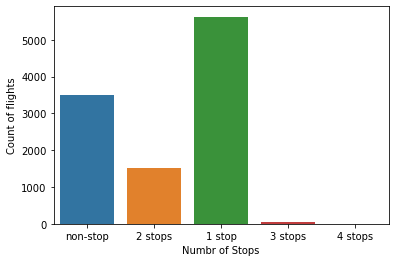

In [52]:
#Number of stops
sns.countplot(df['Total_Stops'])
plt.xlabel('Numbr of Stops')
plt.ylabel('Count of flights')

in the above observation there are most of the flights have 1 stops and very low flights have 4 stops.



In [53]:
Departure_time=[]
for i in df['Dep_Hour']: # Scanning through all the values in Departure Hour
    if (i>=0 and i<6):
        Departure_time.append('Midnight')
    elif (i>=6 and i<12):
         Departure_time.append('Morning')
    elif (i>=12 and i<18):
         Departure_time.append('Afternoon')
    elif (i>=18 and i<24):
        Departure_time.append('Night')

In [54]:
# Storing list in dataframe for visualization purpose
Dep_time = pd.DataFrame(Departure_time)

In [55]:
Dep_time[0].value_counts()

Morning      4282
Night        2702
Afternoon    2604
Midnight     1094
Name: 0, dtype: int64

Text(0, 0.5, 'Count of flights')

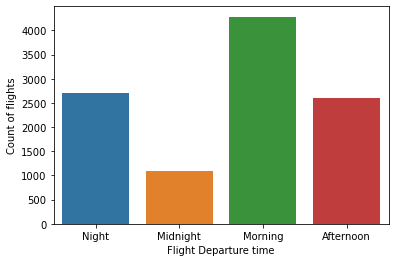

In [56]:
sns.countplot(Dep_time[0])
plt.xlabel('Flight Departure time')
plt.ylabel('Count of flights')

Most of the flights departure time is morning and Very Low flights departure time is Midnight.

In [57]:
Arrival_time=[]
for i in df['Arrival_Hour']: # Scanning through all the values in Arrival Hour
    if (i>=0 and i<6):
        Arrival_time.append('Midnight')
    elif (i>=6 and i<12):
         Arrival_time.append('Morning')
    elif (i>=12 and i<18):
         Arrival_time.append('Afternoon')
    elif (i>=18 and i<24):
        Arrival_time.append('Night')

In [58]:
# Storing list in dataframe for visualization purpose
Arrival_Time = pd.DataFrame(Arrival_time)

In [59]:
Arrival_Time[0].value_counts()


Night        4352
Afternoon    2243
Morning      2203
Midnight     1884
Name: 0, dtype: int64

Text(0, 0.5, 'Count of flights')

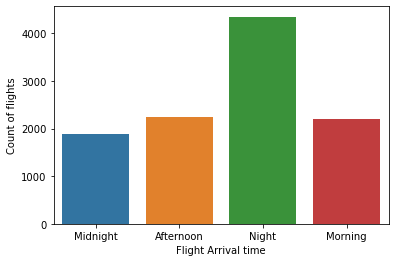

In [60]:
sns.countplot(Arrival_Time[0])
plt.xlabel('Flight Arrival time')
plt.ylabel('Count of flights')

in the above observation we can see mos of the flights Arival time is Night and very Low Flights Arrival time is Midnight.

In [61]:
df['Additional_Info'].value_counts()

No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'No Info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, '1 Long layover'),
  Text(5, 0, 'Change airports'),
  Text(6, 0, 'Business class'),
  Text(7, 0, 'Red-eye flight'),
  Text(8, 0, '2 Long layover')])

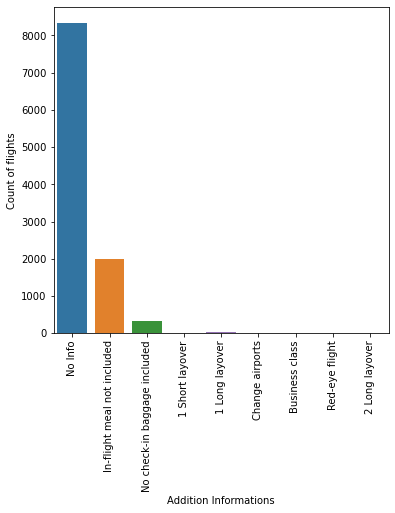

In [62]:
# Addition Info 
plt.figure(figsize = (6, 6))
sns.countplot(df['Additional_Info'])
plt.xlabel('Addition Informations')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

It can be observed that the there is no additional information for more than 8000 flights.

<AxesSubplot:xlabel='Price', ylabel='Density'>

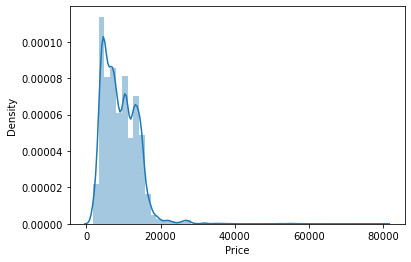

In [64]:
#Plotting the distribution plot
sns.distplot(df['Price'])

In the above observation we see that their is right skeewness.

<AxesSubplot:xlabel='Price'>

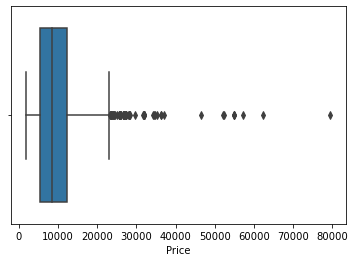

In [65]:
# Finding the outliers
sns.boxplot(df['Price'])

Outliers are present in the dataset, but as we know that it is the price of the flights which changes on the realtime, thus we will not remove the outliers here.

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

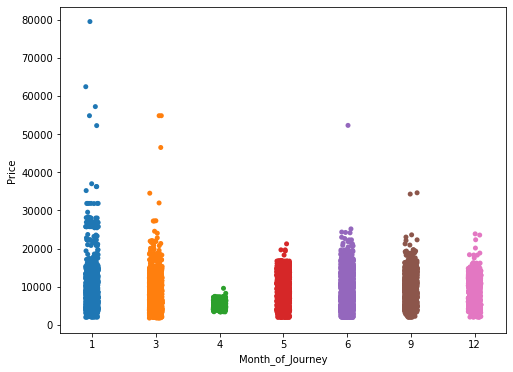

In [66]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Month_of_Journey',y='Price',data=df)

In the obove observation we can see Price is highest in first month and third month of year 2019.

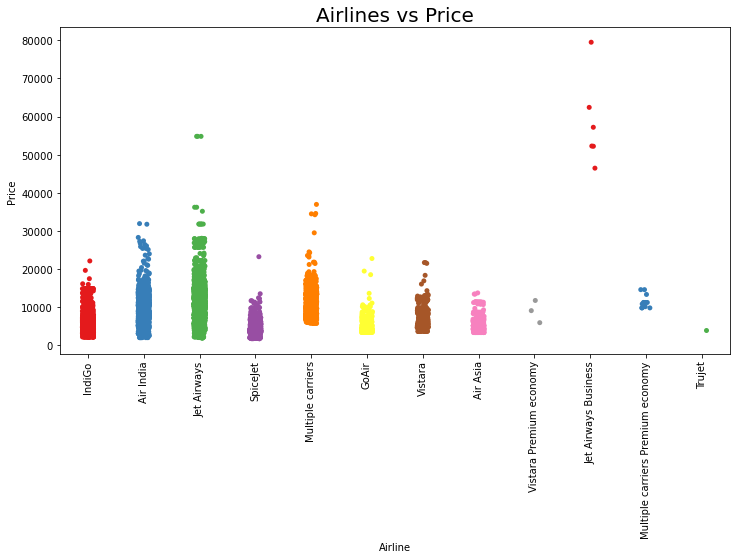

In [67]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df,x='Airline',y='Price', palette='Set1')
plt.title('Airlines vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Jet Airways Business airline shows the highest price of flight

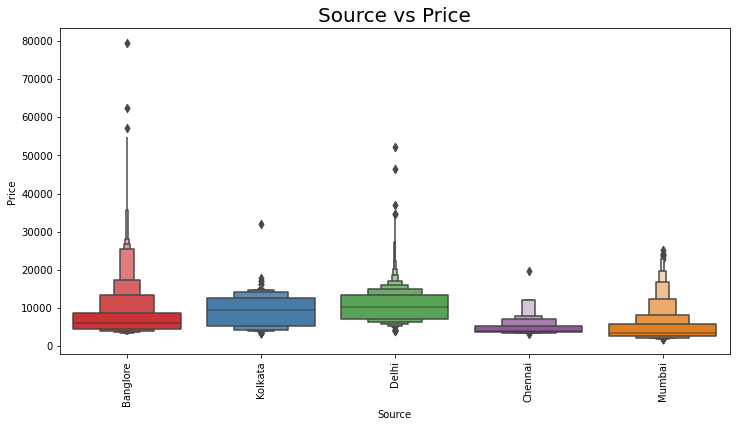

In [69]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Source'], df['Price'], palette='Set1')
plt.title('Source vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Flight price highest from Banglore


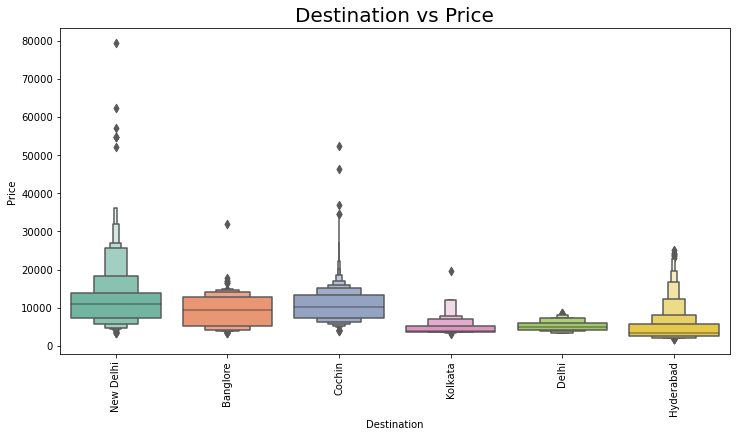

In [70]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Destination'], df['Price'], palette='Set2')
plt.title('Destination vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

New Delhi Destination flights have highest price.

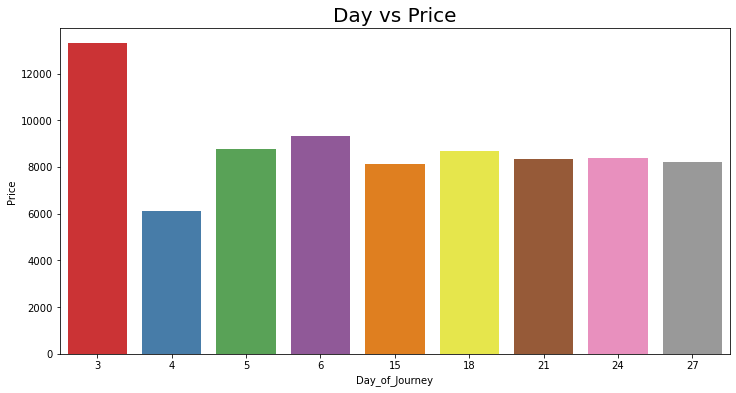

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day_of_Journey', y='Price', data=df,palette='Set1',ci=None)
plt.title('Day vs Price', size=20)
plt.show()

In the above observation we can see 3rd day of the month have highest flight price

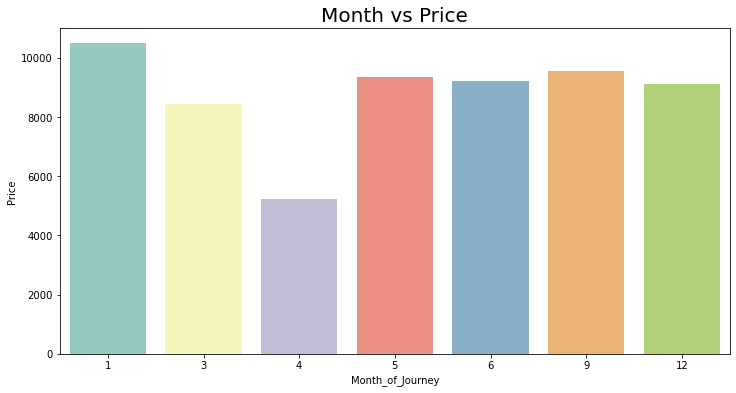

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month_of_Journey', y='Price', data=df,palette='Set3',ci=None)
plt.title('Month vs Price', size=20)
plt.show()

In the above observation we can see in the month of January have highest flightprice.


Text(0, 0.5, 'Price of ticket')

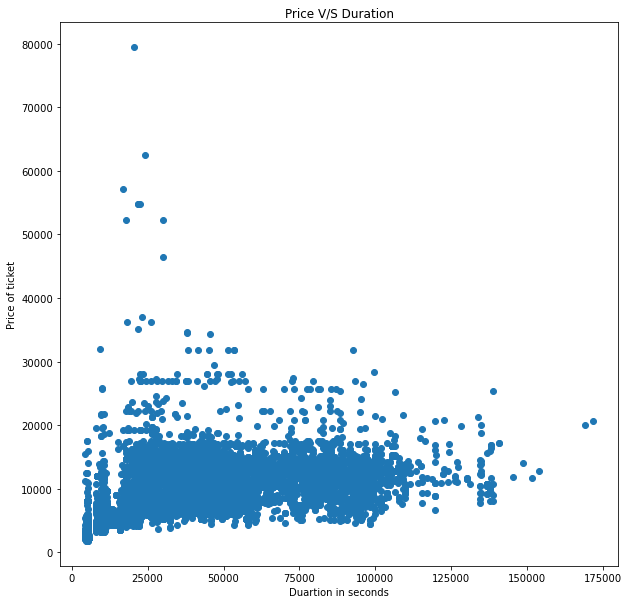

In [73]:
plt.figure(figsize = (10, 10))
plt.title('Price V/S Duration')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')


The above graph shows that positive relationship between price of the flight tiket and duration of the flight.

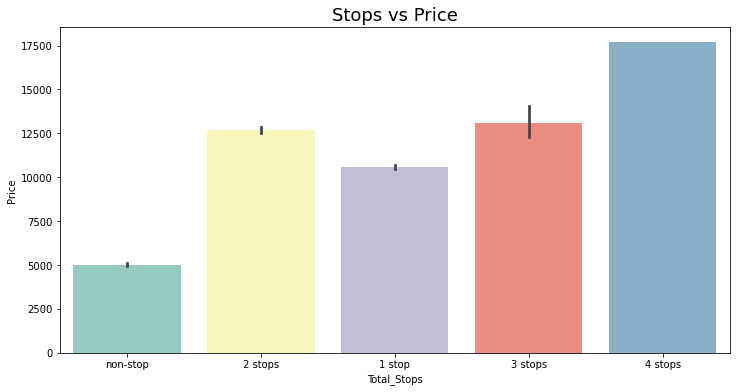

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set3')
plt.title('Stops vs Price', size=18)
plt.show()

One thing can be notice here is that, whichever flight has highest number of stop the price of flight is maximum for that and non stop flight has lowest price.

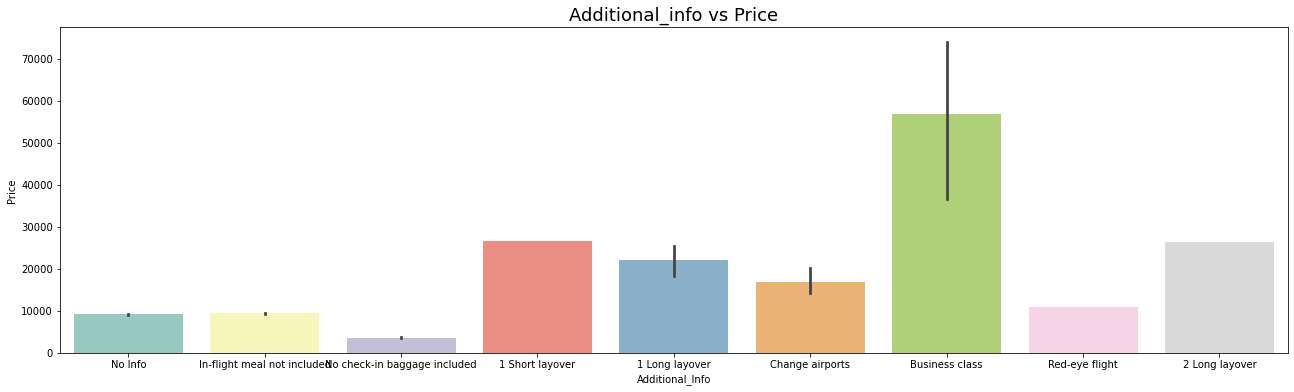

In [76]:
plt.figure(figsize=(22,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set3')
plt.title('Additional_info vs Price', size=18)
plt.show()

Business class shows highest flight price  


#### Encoded the object type Data


In [111]:
#Removing al the columns which are of no use in order to predict the price of the flights because new columns are created for same
df.drop(['Date_of_Journey','Route', 'Dep_Time', 'Arrival_Time', 'Duration','Year_of_Journey'], axis = 1, inplace = True)

In [112]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,IndiGo,Banglore,New Delhi,non-stop,No Info,3897,24,3,22,20,1,10,10200
1,Air India,Kolkata,Banglore,2 stops,No Info,7662,5,1,5,50,13,15,26700


In [115]:
df.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [117]:
# Using lable encoding 
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [118]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,3,0,5,4,6,3897,24,3,22,20,1,10,10200
1,1,3,0,1,6,7662,5,1,5,50,13,15,26700
2,4,2,1,1,6,13882,6,9,9,25,4,25,68400
3,3,3,0,0,6,6218,5,12,18,5,23,30,19500
4,3,0,5,0,6,13302,3,1,16,50,21,35,17100


#### Repeating same steps for test set as peformed for training set

In [119]:
# Extracintg Year, Month and Day from Date of Journey column:
df_test['Day_of_Journey'] = pd.DatetimeIndex(df_test['Date_of_Journey']).day
df_test['Month_of_Journey']=pd.DatetimeIndex(df_test['Date_of_Journey']).month
df_test['Year_of_Journey']=pd.DatetimeIndex(df_test['Date_of_Journey']).year

# Extracting hour and minutes from Dep_Time

df_test['Dep_Hour'] = pd.DatetimeIndex(df_test['Dep_Time']).hour
df_test['Dep_Minute'] = pd.DatetimeIndex(df_test['Dep_Time']).minute

#Similar to Dep Time ,extracting hour and minutes from Arrival_Time
df_test['Arrival_Hour'] = pd.DatetimeIndex(df_test['Arrival_Time']).hour
df_test['Arrival_Minute'] = pd.DatetimeIndex(df_test['Arrival_Time']).minute

#Extracting total duration in seconds
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df_test['Duration(sec)'] = df_test['Duration'].map(convert_into_seconds)

df_test['Additional_Info'].replace('No Info', 'No info', inplace = True)

Departure_time=[]
for i in df_test['Dep_Hour']: # Scanning through all the values in Departure Hour
    if (i>=0 and i<6):
        Departure_time.append('Midnight')
    elif (i>=6 and i<12):
         Departure_time.append('Morning')
    elif (i>=12 and i<18):
         Departure_time.append('Afternoon')
    elif (i>=18 and i<24):
        Departure_time.append('Night')
# Storing list in dataframe for visualization purpose
Dep_time = pd.DataFrame(Departure_time)

Arrival_time=[]
for i in df_test['Arrival_Hour']: # Scanning through all the values in Arrival Hour
    if (i>=0 and i<6):
        Arrival_time.append('Midnight')
    elif (i>=6 and i<12):
         Arrival_time.append('Morning')
    elif (i>=12 and i<18):
         Arrival_time.append('Afternoon')
    elif (i>=18 and i<24):
        Arrival_time.append('Night')

# Storing list in dataframe for visualization purpose
Arrival_Time = pd.DataFrame(Arrival_time)

In [120]:
df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,39300
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019,6,20,10,20,14400
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,85500
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019,8,0,21,0,46800
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55,2,45,10200


In [121]:
#Removing al the columns which are of no use in order to predict the price of the flights because new columns are created for same
df_test.drop(['Date_of_Journey','Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)
#year of journey is same ,so removing the column
df_test.drop(['Year_of_Journey'],axis=1,inplace=True)

#Using label encoding
from sklearn.preprocessing import LabelEncoder
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_test[col] = encoder.fit_transform(df_test[col])
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,4,2,1,0,5,6,6,17,30,4,25,39300
1,3,3,0,0,5,5,12,6,20,10,20,14400
2,4,2,1,0,3,21,5,19,15,19,0,85500
3,6,2,1,0,5,21,5,8,0,21,0,46800
4,0,0,2,4,5,24,6,23,55,2,45,10200


#### Checking for Skewness

In [123]:
#Checking skewness for training dataset.
df.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Total_Stops         0.631532
Additional_Info    -3.258628
Price               1.812405
Day_of_Journey      0.367212
Month_of_Journey    0.629556
Dep_Hour            0.112924
Dep_Minute          0.167234
Arrival_Hour       -0.370146
Arrival_Minute      0.110945
Duration(sec)       0.861541
dtype: float64

In [124]:
#Normale Skewness range is -0.5 to 0.5 so some of the columns are out of range
skewed_columns=['Airlines','Destination','Total_Stops','Addition_Info','Price','Month_of_Journey','Duration']


In [126]:
# Using log transformation 
for col in df.columns:
    if (df.skew().loc[col]>0.55 or df.skew().loc[col]<-.55) :
        df[col]=np.log1p(df[col])

In [127]:
df.skew()

Airline             -0.680164
Source              -0.424023
Destination          0.283053
Total_Stops          0.466329
Additional_Info    -10.913347
Price               -0.254592
Day_of_Journey       0.367212
Month_of_Journey    -0.531114
Dep_Hour             0.112924
Dep_Minute           0.167234
Arrival_Hour        -0.370146
Arrival_Minute       0.110945
Duration(sec)       -0.164398
dtype: float64

#### Finds correlation between Independent and dependent features 

In [129]:
df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
Airline,1.000000,-0.008549,0.032340,-0.065318,-0.011965,0.011027,0.030800,0.003770,-0.036388,-0.079227,-0.020768,-0.106670,-0.089180
Source,-0.008549,1.000000,-0.628512,-0.217336,0.034489,0.017549,0.007563,0.063208,0.059047,-0.056998,0.025635,0.021040,0.121611
Destination,0.032340,-0.628512,1.000000,0.339486,-0.014065,-0.191236,-0.014633,-0.095919,-0.105085,0.105191,-0.051736,-0.015429,-0.347075
Total_Stops,-0.065318,-0.217336,0.339486,1.000000,0.188000,-0.633245,0.045572,-0.042450,0.033052,0.055604,-0.102262,0.179504,-0.746658
Additional_Info,-0.011965,0.034489,-0.014065,0.188000,1.000000,-0.192204,0.029564,0.052587,-0.032003,-0.013914,-0.011794,0.017557,-0.191362
Price,0.011027,0.017549,-0.191236,-0.633245,-0.192204,1.000000,-0.145307,0.026031,-0.005499,-0.052016,0.058867,-0.108705,0.726081
Day_of_Journey,0.030800,0.007563,-0.014633,0.045572,0.029564,-0.145307,1.000000,-0.098520,-0.002301,-0.016433,-0.002176,-0.021423,-0.043602
Month_of_Journey,0.003770,0.063208,-0.095919,-0.042450,0.052587,0.026031,-0.098520,1.000000,0.021316,-0.007278,-0.006475,-0.033210,0.059434
Dep_Hour,-0.036388,0.059047,-0.105085,0.033052,-0.032003,-0.005499,-0.002301,0.021316,1.000000,-0.024745,0.005180,0.067911,-0.014293
Dep_Minute,-0.079227,-0.056998,0.105191,0.055604,-0.013914,-0.052016,-0.016433,-0.007278,-0.024745,1.000000,0.043122,-0.017597,-0.034486


<AxesSubplot:>

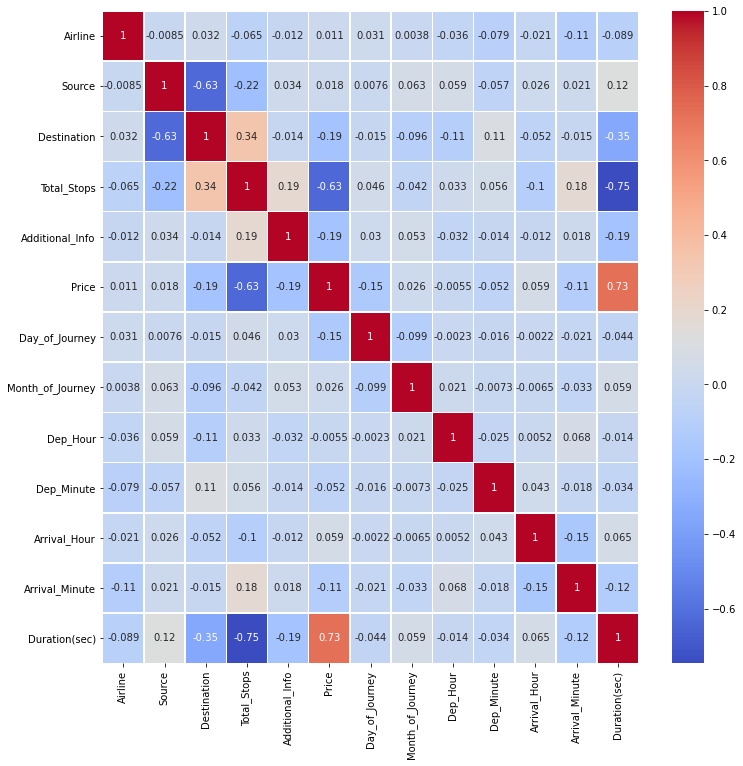

In [131]:
#Plotting heatmap
corr_matrix=df.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

- Price is having good positive correlation with the Duration(sec).
- Total_stops and Duration(sec) are negatively correlated with each other.
- Source and Destination are negatively correlated with each other.
- Total_stops and Destination shows somewhat good correlation with each other.



### Seperating the data into independent and dependent variables

In [132]:
x = df.drop('Price', axis = 1) #Set of input features 
y = df['Price']  #Target variable

#### Using Standard Scaler

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

#### Finding Best Random State.

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best R2_score is",MaxAccu,'on random state',maxRS)

Best R2_score is 0.5939425931032117 on random state 141


In [135]:
# Creating Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

### Model Building

In [138]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.5939425931032116
Mean absolute error :  0.2609893629399681
Mean Squared error : 0.10588720670661694
Cross validation score is  0.5716270952920717


In [139]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.856981364857742
Mean absolute error :  0.13828360180216362
Mean Squared error : 0.0372948344864345
Cross validation score is  0.8124058755488555


In [140]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.8982601399643262
Mean absolute error :  0.10638681033180686
Mean Squared error : 0.02653060726617391
Cross validation score is  0.8097451078768586


In [141]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=10)
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)


R2 score from Random Forest regression is 0.9210591373598833
Mean absolute error :  0.0813241626818044
Mean Squared error : 0.020585334235997156
Cross validation score is  0.929021372395973


In [142]:
model=['Linear Regression','Support Vector Regressor','K Neighbors Regressor','Random Forest Regressor']

acc=[svr_score*100,lr_score*100,knn_score*100,rfr_score*100]
mae=[svr_mae,lr_mae,knn_mae,rfr_mae]
mse=[svr_mse,lr_mse,knn_mse,rfr_mse]
cv_score=[svr_cv*100,lr_cv*100,knn_cv*100,rfr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'Mean Absolute Error':mae,'Mean Squared Error':mse,'Cross validation_score':cv_score})
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

,Model,R2_score,Mean Absolute Error,Mean Squared Error,Cross validation_score
0,Linear Regression,85.698136,0.138284,0.037295,81.240588
1,Support Vector Regressor,59.394259,0.260989,0.105887,57.162710
2,K Neighbors Regressor,89.826014,0.106387,0.026531,80.974511
3,Random Forest Regressor,92.105914,0.081324,0.020585,92.902137


### Choosing the model
- Random forest Regressor model works well in comparision of all giving max r2_score of 92.10 and Mean Absolute Error is 0.08. 


### Applying hyperparamter to the best accuracy model

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
parameters = { 
            "n_estimators"      : [10,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [145]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [146]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [147]:
GCV.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 200}

In [148]:
Final_Model=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=4,n_estimators=200)
Final_Model.fit(x_train,y_train)
y_pred=Final_Model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)

R2 Score of the model is  93.08722412313901
Mean absolute error :  0.07736918716395387


### Conclusion
- Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting the price of the flights.

### Saving the Model

In [149]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib
joblib.dump(Final_Model,'Final_Model.pkl')

['Final_Model.pkl']